# WHAT IS A SUPPORT VECTOR MACHINE?

They are algorithims that analyze data and recognize patterns.

Their use is for classification and regression analysis.

Points that are mapped in space, in seperate catagories that are clearly seperated by a gap. New points are then mapped in this space and predicted to belong to either category.

When we add a new point does it belong to the red or the green class?

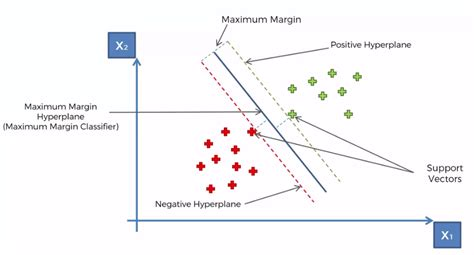

The vector points that the margin line touches are the support vector points.  They are the training points.

Non-linear seperable data can not be seperated with a straight ine.
We use the kernel trick to use the Z-label to view in a 3rd dimension with another hyperplane.
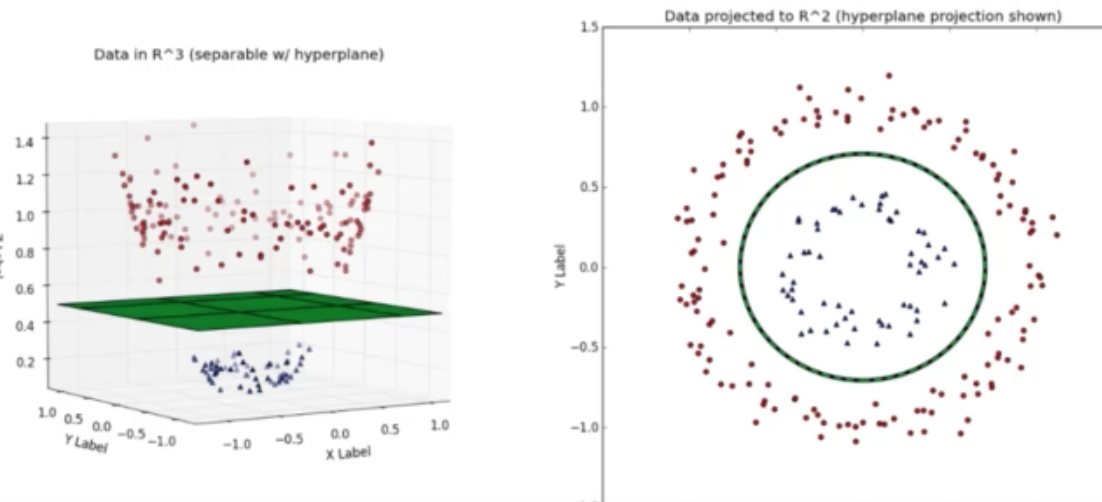


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Get the Data

We'll use the built in breast cancer dataset from Scikit Learn. We can get with the load function:

In [ ]:
from sklearn.datasets import load_breast_cancer

In [ ]:
df = load_breast_cancer()

The data set is presented in a dictionary form:

In [ ]:
df.keys()

We can grab information and arrays out of this dictionary to set up our data frame and understanding of the features:

In [ ]:
print(df['DESCR'])

In [ ]:
df['feature_names']

## Set up DataFrame

In [ ]:
df_feat = pd.DataFrame(df['data'],columns=df['feature_names'])
df_feat.info()

In [ ]:
df_feat.head()

Shows the target column of the df. 0 and 1's

In [ ]:
df['target']

In [ ]:
df['target_names']

In [ ]:
df_target = pd.DataFrame(df['target'],columns=['Cancer'])

## TRAIN TEST SPLIT AND PREDICTIONS

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(df_feat, np.ravel(df_target), test_size=0.30, random_state=101)

model = SVC()
model.fit(X_train,y_train)

predictions = model.predict(X_test)

## EVALUATIONS

Now let's predict using the trained model.

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

# Gridsearch

It helps to loop through predefined hyperparameters and fit your estimator (model) on your training set. So, in the end, you can select the best parameters from the listed hyperparameters. This idea of creating a 'grid' of parameters and just trying out all the possible combinations is called a Gridsearch, this method is common enough that Scikit-learn has this functionality built in with GridSearchCV! The CV stands for cross-validation which is the

GridSearchCV takes a dictionary that describes the parameters that should be tried and a model to train. The grid of parameters is defined as a dictionary, where the keys are the parameters and the values are the settings to be tested. 

In [ ]:
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 

Dictionary where the keys are the parameters that go into the model.
C controls the cost of misclassification on the training data.

A large C value gives you low bias and high variance. low bias because you penalize the cost of misclassification a lot
smaller C value = higher bias, lower variance

Gamma parameter-Gamma is large then the variance is small implying that the support vector does not have a widespread influence.
These are paramaters that can be adjusted with the GridSearch function



In [ ]:
from sklearn.model_selection import GridSearchCV

One of the great things about GridSearchCV is that it is a meta-estimator. It takes an estimator like SVC, and creates a new estimator, that behaves exactly the same - in this case, like a classifier. You should add refit=True and choose verbose to whatever number you want, higher the number, the more verbose (verbose just means the text output describing the process).

In [ ]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)


What fit does is a bit more involved then usual. First, it runs the same loop with cross-validation, to find the best parameter combination. Once it has the best combination, it runs fit again on all data passed to fit (without cross-validation), to built a single new model using the best parameter setting.

In [ ]:
# May take awhile!
grid.fit(X_train,y_train)

You can inspect the best parameters found by GridSearchCV in the best_params_ attribute, and the best estimator in the best\_estimator_ attribute:

In [ ]:
grid.best_params_

In [ ]:
grid.best_estimator_

Then you can re-run predictions on this grid object just like you would with a normal model.

In [ ]:
grid_predictions = grid.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,grid_predictions))

In [ ]:
print(classification_report(y_test,grid_predictions))

Model doing a little better after the GridSearch